In [236]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [237]:
animals = pd.read_csv('train.csv')
animals.shape

(26729, 10)

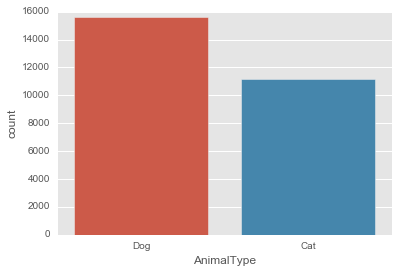

In [238]:
plt.style.use('ggplot')
sns.countplot(animals.AnimalType)

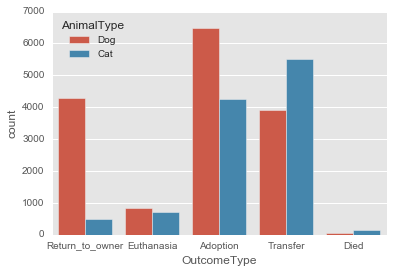

In [239]:
sns.countplot(animals.OutcomeType,hue = animals.AnimalType)

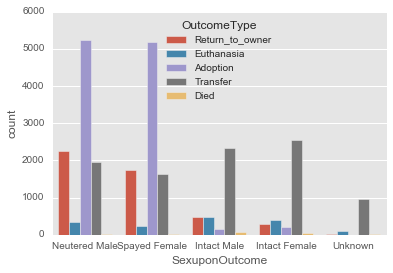

In [240]:
sns.countplot(animals.SexuponOutcome,hue = animals.OutcomeType)

Intact animals have lower chance to get adopted or return to owner


In [241]:
#convert age into days
animals['AgeuponOutcome'] = animals['AgeuponOutcome'].fillna(0)
def age_converter(sr):
    days = []
    for row in sr:
        row = row.split(' ')
        if 'year' in row:
            day = float(row[0]) * 365 
            days.append(day)
        elif 'years' in row:
            day = float(row[0]) * 365 
            days.append(day)      
        elif 'month' in row:
            day = float(row[0]) * 30
            days.append(day)
        elif 'months' in row:
            day = float(row[0]) * 30
            days.append(day)
        elif 'week' in row:
            day = float(row[0]) * 7
            days.append(day)
        elif 'weeks' in row:
            day = float(row[0]) * 7
            days.append(day)
        else:
            day = float(row[0])
            days.append(day)
    return days
animals['AgeuponOutcome'] = age_converter(animals['AgeuponOutcome'].astype(str).tolist())
animals['AgeuponOutcome'] = animals['AgeuponOutcome']/365



In [242]:
import math
animals['AgeuponOutcome'] = animals['AgeuponOutcome'].apply(math.floor)
animals['AgeuponOutcome']

0         1
1         1
2         2
3         0
4         2
5         0
6         0
7         0
8         0
9         1
10        2
11        2
12        4
13        2
14        1
15        0
16        0
17        0
18        2
19        1
20        0
21        1
22        2
23        0
24        0
25        0
26        0
27        5
28        0
29        7
         ..
26699     2
26700     0
26701     0
26702     2
26703     6
26704     0
26705     0
26706     0
26707     1
26708     2
26709     0
26710     0
26711     1
26712    12
26713    18
26714     0
26715     0
26716     0
26717     9
26718     0
26719     2
26720     0
26721     5
26722     0
26723     6
26724     0
26725     0
26726     4
26727     0
26728     1
Name: AgeuponOutcome, dtype: int64

In [243]:
#animals.AgeuponOutcome.hist(bins =15)


Most animals are less than 1 year old

In [244]:
animal = animals.drop(['AnimalID','Name','OutcomeSubtype'],axis = 1)

In [245]:
animal.head(0)

,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color


In [246]:
# get male/female
sex = []
for row in animal['SexuponOutcome']:
    if 'Male' in str(row):
        s = 'Male'
        sex.append(s)
    elif 'Female' in str(row):
        s = 'Female'
        sex.append(s)
    else:
        s = 'Unknown'
        sex.append(s)
animal['Sex'] = sex

In [247]:
#get intact or not
intact = []
for row in animal['SexuponOutcome']:
    if 'Intact' in str(row):
        i = 'Intact'
        intact.append(i)
    elif 'Unknown' in str(row):
        i = 'Unknown'
        intact.append(i)
    else:
        i = 'Neutered'
        intact.append(i)
animal['IntactOrNot'] = intact

In [248]:
animal['Breed']=animal['Breed'].str.replace('/',' Mix ')
animal['Breed']=animal['Breed'].str.split(' ')
for l in animal['Breed']:
    l.sort()
animal['Breed'] = animal['Breed'].str.join(' ')

In [249]:
#cleanup Color, reorder word so A B is the same as B A
animal['Color'] = animal['Color'].str.split('/')
for l in animal['Color']:
    l.sort()
for l in animal['Color'].tolist():
    " ".join(str(item) for item in l)
animal['Color'] = animal['Color'].str.join(' ')

def multicolor(sr):
    color = []
    for row in sr:
        if len(row)>9: 
            col = 'multicolor'
            color.append(col)
            break
        elif i == 'Tricolor':
            col = 'multicolor'
            color.append(col)
        else:
            col = 'unicolor'
            color.append(col)
    return color
multicolor(animal['Color'])

In [250]:
color = []
for row in animal.Color:
    if row == 'Tricolor':
        c = 'multicolor'
        color.append(c)
    elif ' ' in row:
        c = 'multicolor'
        color.append(c)
    else:
        c = row
        color.append(c)
colors=[]
for item in color:
    if len(item) >9:
        co = 'multicolor'
        colors.append(co)
    else:
        co = 'unicolor'
        colors.append(co)
        

In [251]:
animal['ColorCode'] =colors

In [252]:
breed = []
for row in animal.Breed:
    if 'Mix' in row:
        bre = 'Mix'
        breed.append(bre)
    else:
        bre = 'Pure'
        breed.append(bre)
animal['BreedCode'] = breed

In [253]:
agecode = []
for row in animals['AgeuponOutcome']:
    if row<=0:
        age = 0
        agecode.append(age)
    elif 0<row<=3:
        age = 1
        agecode.append(age)
    elif 3<row<=10:
        age = 2
        agecode.append(age)
    else:
        age = 3
        agecode.append(age)
animal['AgeCode'] = agecode

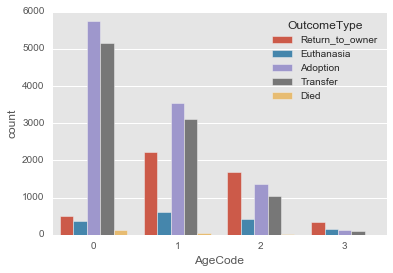

In [254]:
sns.countplot(animal.AgeCode, hue = animals.OutcomeType)

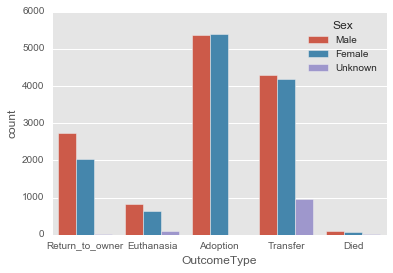

In [255]:
sns.countplot(animal['OutcomeType'],hue = animal['Sex'])

Sex of animal doesn't seem to make a difference 

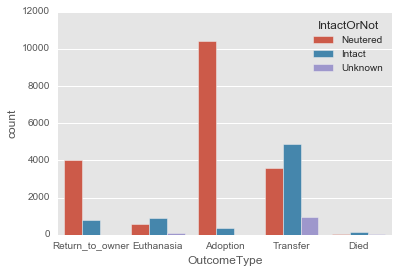

In [256]:
sns.countplot(animal['OutcomeType'],hue = animal['IntactOrNot'])

Neutered animal have a higher rate to get adopted or returned to owner

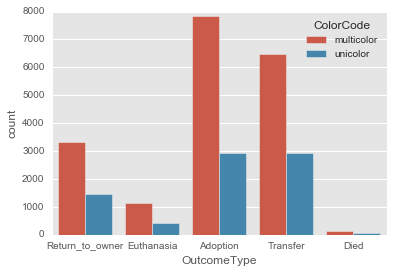

In [257]:
sns.countplot(animal['OutcomeType'], hue = animal['ColorCode'])

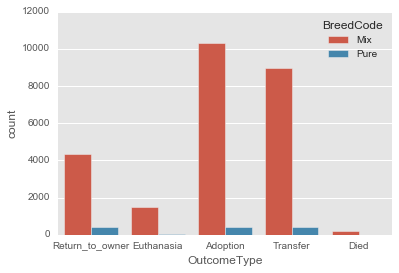

In [258]:
sns.countplot(animal['OutcomeType'], hue = animal['BreedCode'])

In [259]:
type_mapping = {'Cat':0, 'Dog':1}
sex_mapping = {'Male':0, 'Female':1}
color_mapping = {'multicolor':0, 'unicolor':1}
breed_mapping = {'Mix': 0, 'Pure': 1}
intact_mapping = {'Intact':0, 'Neutered':1}
animal['AnimalType'] = animal['AnimalType'].map(type_mapping)
animal['BreedCode'] = animal['BreedCode'].map(breed_mapping)
animal['ColorCode'] = animal['ColorCode'].map(color_mapping)
animal['Sex'] = animal['Sex'].map(sex_mapping)
animal['IntactOrNot'] = animal['IntactOrNot'].map(intact_mapping)

In [260]:
animal.fillna(0)

,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,IntactOrNot,ColorCode,BreedCode,AgeCode
0,2014-02-12 18:22:00,Return_to_owner,1,Neutered Male,1,Mix Sheepdog Shetland,Brown White,0.0,1.0,0,0,1
1,2013-10-13 12:44:00,Euthanasia,0,Spayed Female,1,Domestic Mix Shorthair,Cream Tabby,1.0,1.0,0,0,1
2,2015-01-31 12:28:00,Adoption,1,Neutered Male,2,Bull Mix Pit,Blue White,0.0,1.0,0,0,1
3,2014-07-11 19:09:00,Transfer,0,Intact Male,0,Domestic Mix Shorthair,Blue Cream,0.0,0.0,0,0,0
4,2013-11-15 12:52:00,Transfer,1,Neutered Male,2,Apso Lhasa Miniature Mix Poodle,Tan,0.0,1.0,1,0,1
5,2014-04-25 13:04:00,Transfer,1,Intact Female,0,Cairn Chihuahua Mix Shorthair Terrier,Black Tan,1.0,0.0,0,0,0
6,2015-03-28 13:11:00,Transfer,0,Intact Male,0,Domestic Mix Shorthair,Blue Tabby,0.0,0.0,0,0,0
7,2015-04-30 17:02:00,Transfer,0,Unknown,0,Domestic Mix Shorthair,Brown Tabby,0.0,0.0,0,0,0
8,2014-02-04 17:17:00,Adoption,1,Spayed Female,0,American Bull Mix Pit Terrier,Red White,1.0,1.0,0,0,0
9,2014-05-03 07:48:00,Adoption,1,Spayed Female,1,Cairn Terrier,White,1.0,1.0,1,1,1


In [302]:
data_col =['AnimalType','AgeCode','ColorCode','BreedCode','IntactOrNot'] 
data = animal[data_col]
outcome = animal['OutcomeType']
#data['AgeuponOutcome'] = data['AgeuponOutcome']
data.shape

(26729, 5)

In [262]:
#merge new features
new = pd.read_csv('train_newfeatures.csv')
new.head()
data = pd.concat([data,new], axis = 1)
del data['Unnamed: 0'] 


In [263]:
data.to_csv('cleaned_train.csv')

In [294]:
outcome.to_csv('outcome_train.csv')

In [264]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [265]:
x_train,x_test,y_train,y_test = train_test_split(data.values,outcome.values,test_size = 0.01)
x_train = np.nan_to_num(x_train)
x_test = np.nan_to_num(x_test)

In [266]:
#300 estimators reached the best
forest = RandomForestClassifier(criterion = 'entropy',max_features='sqrt', max_depth = 8, n_estimators = 5000,random_state = 2)
forest = forest.fit(x_train,y_train)
#ada = AdaBoostClassifier(base_estimator = forest,n_estimators = 500,learning_rate =0.1)

In [267]:
#ada = ada.fit(x_train,y_train)

param_test2 = {'n_estimators':list(range(20,81,10)),'max_depth':list(range(5,16,2)), 'min_samples_split':list(range(200,1001,200))}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, max_features='sqrt', subsample=0.8, random_state=10), param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(x_train,y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

In [268]:
#forest.score(x_train,y_train)
y_train_pred = forest.predict(x_train)
y_test_pred = forest.predict(x_test)

In [269]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)
#forest.score(x_test,y_test)


0.68164468463021055

In [270]:
accuracy_score(y_test,y_test_pred)

0.68656716417910446

In [271]:
test = pd.read_csv('test.csv')
test.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


In [272]:
test['AgeuponOutcome'] = test['AgeuponOutcome'].fillna(0)
test['AgeuponOutcome'] = age_converter(test['AgeuponOutcome'].astype(str).tolist())
test['AgeuponOutcome'] = test['AgeuponOutcome']/365

In [273]:
test = test.drop(['Name'],axis = 1)

In [274]:
# get male/female
sex = []
for row in test['SexuponOutcome']:
    if 'Male' in str(row):
        s = 'Male'
        sex.append(s)
    elif 'Female' in str(row):
        s = 'Female'
        sex.append(s)
    else:
        s = 'Unknown'
        sex.append(s)
test['Sex'] = sex

In [275]:
#cleanup Color, reorder word so A B is the same as B A
test['Color'] = test['Color'].str.split('/')
for l in test['Color']:
    l.sort()
for l in test['Color'].tolist():
    " ".join(str(item) for item in l)
test['Color'] = test['Color'].str.join(' ')
color = []
for row in test.Color:
    if row == 'Tricolor':
        c = 'multicolor'
        color.append(c)
    elif ' ' in row:
        c = 'multicolor'
        color.append(c)
    else:
        c = row
        color.append(c)
colors=[]
for item in color:
    if len(item) >9:
        co = 'multicolor'
        colors.append(co)
    else:
        co = 'unicolor'
        colors.append(co)
test['ColorCode'] =colors        

In [276]:
test['Breed']=test['Breed'].str.replace('/',' Mix ')
test['Breed']=test['Breed'].str.split(' ')
for l in test['Breed']:
    l.sort()
test['Breed'] = test['Breed'].str.join(' ')
breed = []
for row in test.Breed:
    if 'Mix' in row:
        bre = 'Mix'
        breed.append(bre)
    else:
        bre = 'Pure'
        breed.append(bre)
test['BreedCode'] = breed

In [277]:
#get intact or not
intact = []
for row in test['SexuponOutcome']:
    if 'Intact' in str(row):
        i = 'Intact'
        intact.append(i)
    elif 'Unknown' in str(row):
        i = 'Unknown'
        intact.append(i)
    else:
        i = 'Neutered'
        intact.append(i)
test['IntactOrNot'] = intact

In [278]:
#agecode
agecode = []
for row in test['AgeuponOutcome']:
    if row<=0:
        age = 0
        agecode.append(age)
    elif 0<row<=3:
        age = 1
        agecode.append(age)
    elif 3<row<=10:
        age = 2
        agecode.append(age)
    else:
        age = 3
        agecode.append(age)
test['AgeCode'] = agecode

In [279]:
type_mapping = {'Cat':0, 'Dog':1}
sex_mapping = {'Male':0, 'Female':1}
color_mapping = {'multicolor':0, 'unicolor':1}
breed_mapping = {'Mix': 0, 'Pure': 1}
intact_mapping = {'Intact':0, 'Neutered':1}
test['AnimalType'] = test['AnimalType'].map(type_mapping)
test['BreedCode'] = test['BreedCode'].map(breed_mapping)
test['ColorCode'] = test['ColorCode'].map(color_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)
test['IntactOrNot'] = test['IntactOrNot'].map(intact_mapping)
test.head()

,ID,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,ColorCode,BreedCode,IntactOrNot,AgeCode
0,1,2015-10-12 12:15:00,1,Intact Female,0.821918,Labrador Mix Retriever,Red White,1.0,0,0,0.0,1
1,2,2014-07-26 17:59:00,1,Spayed Female,2.000000,German Husky Mix Shepherd Siberian,Black Tan,1.0,0,0,1.0,1
2,3,2016-01-13 12:20:00,0,Neutered Male,1.000000,Domestic Mix Shorthair,Brown Tabby,0.0,0,0,1.0,1
3,4,2013-12-28 18:12:00,1,Intact Male,0.328767,Collie Mix Smooth,Tricolor,0.0,0,0,0.0,1
4,5,2015-09-24 17:59:00,1,Neutered Male,2.000000,Miniature Mix Poodle,White,0.0,1,0,1.0,1


In [301]:
test = test[data_col]
test_new = pd.read_csv('test_newfeatures.csv')
test = pd.concat([test,test_new],axis = 1)
del test['Unnamed: 0']
x_test = test.values
test.shape

(11456, 11)

In [281]:
test.to_csv('cleaned_test.csv')

In [282]:
x_test = np.nan_to_num(x_test)

In [283]:
pred = forest.predict_proba(x_test)

In [284]:
prediction = pd.DataFrame(pred)

In [285]:
prediction.columns = ['Adoption','Died','Euthanasia','Return_to_owner', 'Transfer']

In [286]:
ID = pd.read_csv('test.csv')
prediction['ID'] = ID['ID']

In [287]:
prediction = prediction[['ID', 'Adoption','Died','Euthanasia','Return_to_owner', 'Transfer']]

In [288]:
prediction.head()

,ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer
0,1,0.056515,0.002186,0.110912,0.385616,0.444772
1,2,0.635841,0.001364,0.016808,0.266254,0.079732
2,3,0.376973,0.006423,0.029295,0.178081,0.409227
3,4,0.150653,0.004136,0.130514,0.397333,0.317364
4,5,0.473714,0.001509,0.023184,0.400961,0.100632


In [289]:
prediction.to_csv('Prediction_9.csv')

In [290]:
pre = pd.read_csv('Prediction_9.csv')
prediction = pre.drop('Unnamed: 0',axis = 1)

In [291]:
prediction.to_csv('prediction_10.csv')

In [292]:
prediction.shape

(11456, 6)

In [293]:
pre.shape

(11456, 7)

In [295]:
target = pd.read_csv('outcome_train.csv')

In [296]:
target.head()

,Return_to_owner
0,Euthanasia
1,Adoption
2,Transfer
3,Transfer
4,Transfer


In [297]:
from sklearn.preprocessing import LabelEncoder
outcome_le = LabelEncoder()
y = outcome_le.fit_transform(target.values)

//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:125: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [299]:
len(y)

26728

In [300]:
target.shape

(26728, 1)